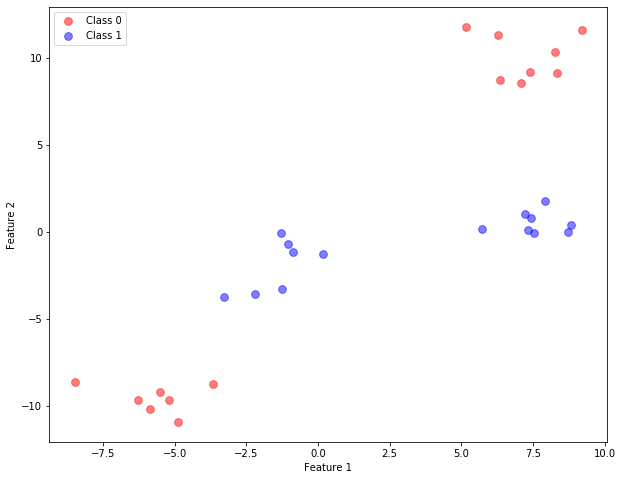

In [0]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=30, n_features=2, centers= 4, random_state=8)
y = y % 2

plt.figure(figsize=(10,8))
plt.scatter(X[y==0,0], X[y==0,1], marker = 'o', c='red', s= 60, alpha =0.5, label = 'Class 0')
plt.scatter(X[y==1,0], X[y==1,1], marker = 'o', c='blue', s= 60, alpha =0.5, label = 'Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [0]:
import numpy as np
NewFeature = X[:,1:]**2

In [0]:
import numpy as np
X_NewFeature = np.hstack([X,NewFeature])

Text(0.5, 0, 'Third Feature')

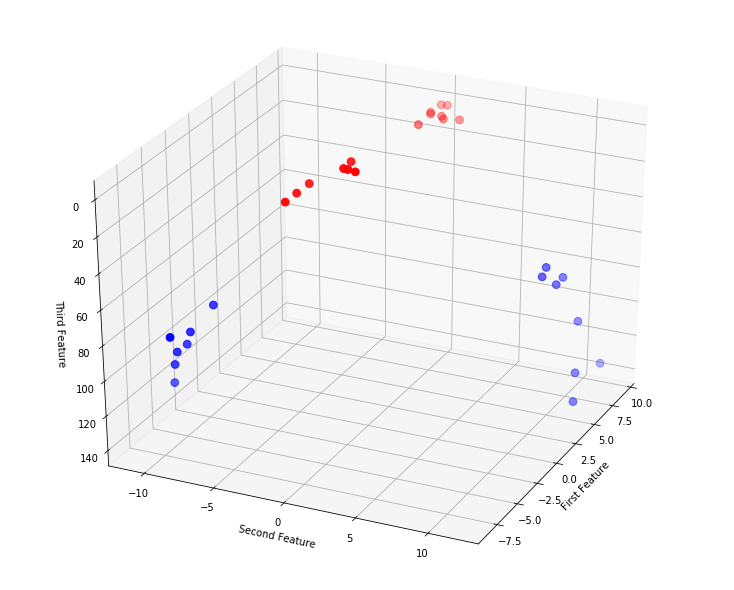

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(figsize=(10,8))

axe = Axes3D(figure, elev=-150, azim =-25)

axe.scatter(X_NewFeature[y==0,0], X_NewFeature[y==0,1], X_NewFeature[y==0,2], c = 'b', s=60)
axe.scatter(X_NewFeature[y==1,0], X_NewFeature[y==1,1], X_NewFeature[y==1,2], c = 'r', s=60)

axe.set_xlabel('First Feature')
axe.set_ylabel('Second Feature')
axe.set_zlabel('Third Feature')

In [0]:
from sklearn.svm import LinearSVC
LSVCObject_3D = LinearSVC(C=1, max_iter=10000)
LSVCFitting_3D = LSVCObject_3D.fit(X_NewFeature,y)

Text(0.5, 0, 'Third Feature')

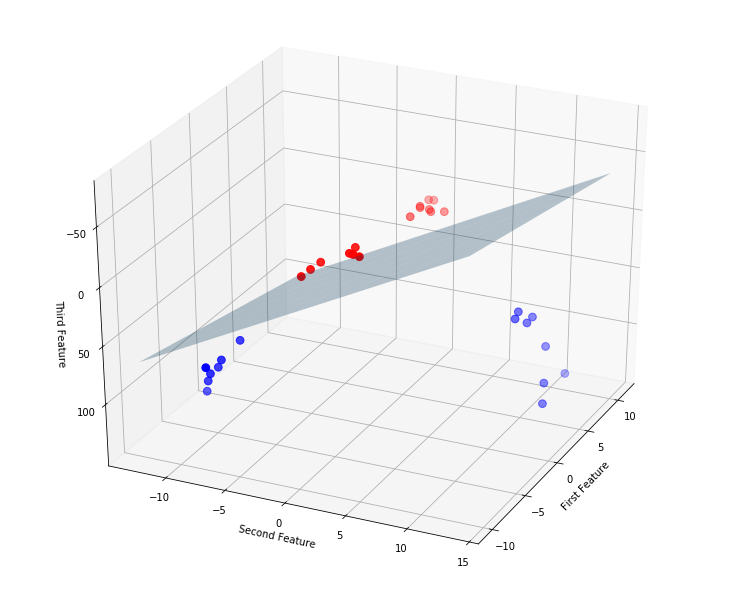

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

coef = LSVCFitting_3D.coef_.ravel()
intercept = LSVCFitting_3D.intercept_

figure = plt.figure(figsize=(10,8))

axe = Axes3D(figure, elev=-150, azim =-25)

x_axis = np.linspace(X_NewFeature[:,0].min()-2, X_NewFeature[:,0].max()+2,50)
y_axis = np.linspace(X_NewFeature[:,1].min()-2, X_NewFeature[:,1].max()+2,50)

X_point, Y_point = np.meshgrid(x_axis, y_axis)

Z_point = ((coef[0]*X_point+coef[1]*Y_point+intercept)/(-coef[2]))
           
axe.plot_surface(X_point, Y_point, Z_point, rstride = 8, cstride =8, alpha = 0.3)

axe.scatter(X_NewFeature[y==0,0], X_NewFeature[y==0,1], X_NewFeature[y==0,2], c = 'b', s=60)
axe.scatter(X_NewFeature[y==1,0], X_NewFeature[y==1,1], X_NewFeature[y==1,2], c = 'r', s=60)

axe.set_xlabel('First Feature')
axe.set_ylabel('Second Feature')
axe.set_zlabel('Third Feature')

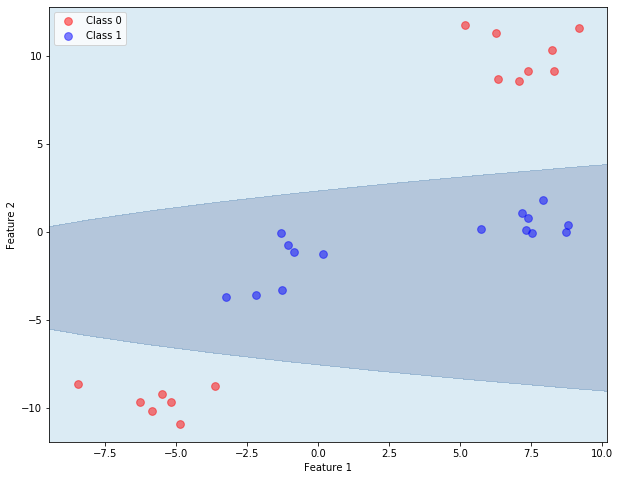

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

X_axis = np.linspace(X_NewFeature[:,0].min()-1, X_NewFeature[:,0].max()+1,50)
Y_axis = np.linspace(X_NewFeature[:,1].min()-1, X_NewFeature[:,1].max()+1,50)

x_grid, y_grid = np.meshgrid(X_axis,Y_axis)
z_grid = y_grid**2

X_samples_3D = np.c_[x_grid.ravel(), y_grid.ravel(), z_grid.ravel()]

Prediction_X = LSVCFitting_3D.decision_function(X_samples_3D)

plt.figure(figsize = (10,8))
plt.contourf(x_grid, y_grid, Prediction_X.reshape(x_grid.shape),\
levels = [Prediction_X.min(),0,Prediction_X.max()], cmap = cm.Blues, alpha = 0.3)
plt.scatter(X[y==0,0], X[y==0,1], marker = 'o', c='red', s= 60, alpha =0.5, label = 'Class 0')
plt.scatter(X[y==1,0], X[y==1,1], marker = 'o', c='blue', s= 60, alpha =0.5, label = 'Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [0]:
Prediction_X.shape

(2500,)

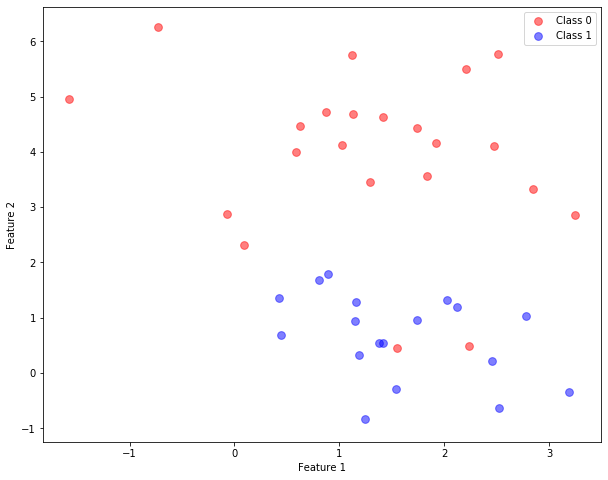

In [0]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=40, n_features=2, centers= 2, random_state=0)

y[np.array([7,24])] = 0

plt.figure(figsize=(10,8))
plt.scatter(X[y==0,0], X[y==0,1], marker = 'o', c='red', s= 60, alpha =0.5, label = 'Class 0')
plt.scatter(X[y==1,0], X[y==1,1], marker = 'o', c='blue', s= 60, alpha =0.5, label = 'Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [0]:
from sklearn.svm import SVC

SVCObject = SVC(kernel = 'rbf', C=1, gamma = 100)
SVCFitting = SVCObject.fit(X,y)

In [0]:
SVCFitting.support_

array([ 0,  3,  4,  6,  7,  8,  9, 10, 11, 12, 16, 18, 19, 23, 24, 30, 31,
       33, 35, 36, 37, 39,  1,  2,  5, 13, 14, 15, 17, 20, 21, 22, 25, 26,
       27, 28, 29, 32, 34, 38])

In [0]:
SVCFitting.support_vectors_

array([[ 0.62835793,  4.4601363 ],
       [ 3.2460247 ,  2.84942165],
       [ 2.50904929,  5.7731461 ],
       [-0.07228289,  2.88376939],
       [ 1.54561534,  0.45958936],
       [ 0.58894326,  4.00148458],
       [ 1.28933778,  3.44969159],
       [ 1.42013331,  4.63746165],
       [ 2.47034915,  4.09862906],
       [ 1.84070628,  3.56162231],
       [ 2.84382807,  3.32650945],
       [ 1.9263585 ,  4.15243012],
       [-0.73000011,  6.25456272],
       [ 2.20656076,  5.50616718],
       [ 2.23269366,  0.49588272],
       [ 1.0220286 ,  4.11660348],
       [ 1.1312175 ,  4.68194985],
       [ 1.7373078 ,  4.42546234],
       [ 0.08848433,  2.32299086],
       [ 1.12031365,  5.75806083],
       [ 0.87305123,  4.71438583],
       [-1.57671974,  4.95740592],
       [ 0.89011768,  1.79849015],
       [ 3.19466821, -0.33716216],
       [ 1.74371499,  0.953829  ],
       [ 1.24212124, -0.82861894],
       [ 1.54446238, -0.28296852],
       [ 2.78435808,  1.02664657],
       [ 2.52092996,

In [0]:
SVCFitting.n_support_

array([22, 18])

In [0]:
SVCFitting.dual_coef_

array([[-0.78403463, -0.78403766, -0.78415389, -0.78416456, -0.91625214,
        -0.78416456, -0.7840833 , -0.78400093, -0.78415212, -0.7840833 ,
        -0.78415361, -0.7841687 , -0.78415396, -0.78414183, -0.78483597,
        -0.78414545, -0.78309596, -0.78413902, -0.78414545, -0.78480369,
        -0.78324541, -0.78418144,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.96596979,  1.        ,  1.        ,
         1.        ,  0.41636781,  1.        ,  1.        ,  1.        ]])

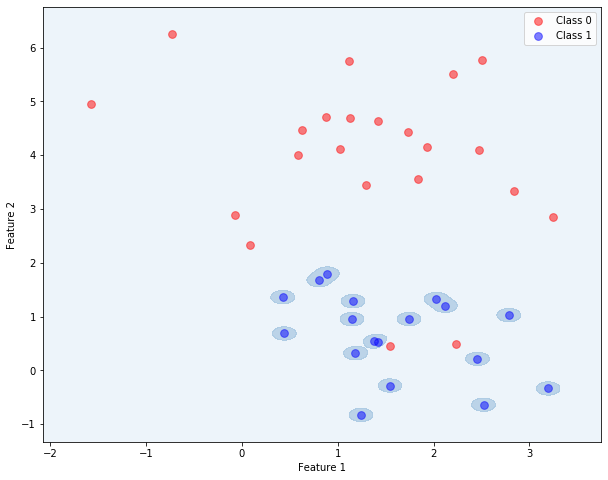

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

x_index = np.linspace(x_min, x_max, 1000)
y_index = np.linspace(y_min, y_max, 1000)

x_grid, y_grid = np.meshgrid(x_index, y_index)

X_samples = np.c_[x_grid.ravel(), y_grid.ravel()]

Prediction_X = SVCFitting.decision_function(X_samples)

plt.figure(figsize = (10,8))
plt.contourf(x_grid, y_grid, Prediction_X.reshape(x_grid.shape),\
levels = [Prediction_X.min(),0,Prediction_X.max()], cmap = cm.Blues, alpha = 0.3)
plt.scatter(X[y==0,0], X[y==0,1], marker = 'o', c='red', s= 60, alpha =0.5, label = 'Class 0')
plt.scatter(X[y==1,0], X[y==1,1], marker = 'o', c='blue', s= 60, alpha =0.5, label = 'Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



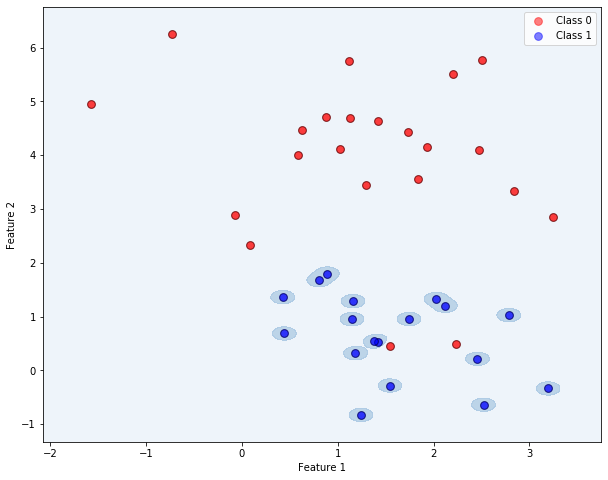

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

x_index = np.linspace(x_min, x_max, 1000)
y_index = np.linspace(y_min, y_max, 1000)

x_grid, y_grid = np.meshgrid(x_index, y_index)

X_samples = np.c_[x_grid.ravel(), y_grid.ravel()]

Prediction_X = SVCFitting.decision_function(X_samples)

plt.figure(figsize = (10,8))
plt.contourf(x_grid, y_grid, Prediction_X.reshape(x_grid.shape),\
levels = [Prediction_X.min(),0,Prediction_X.max()], cmap = cm.Blues, alpha = 0.3)
plt.scatter(X[y==0,0], X[y==0,1], marker = 'o', c='red', s= 60, alpha =0.5, label = 'Class 0')
plt.scatter(X[y==1,0], X[y==1,1], marker = 'o', c='blue', s= 60, alpha =0.5, label = 'Class 1')

SV = SVCFitting.support_vectors_
SV_Class = SVCFitting.dual_coef_ > 0
Class = SV_Class.ravel()
plt.scatter(SV[Class==0,0], SV[Class==0,1], marker = 'o', c='red', s= 60, alpha =0.5,\
edgecolor = 'black')
plt.scatter(SV[Class==1,0], SV[Class==1,1], marker = 'o', c='blue', s= 60, alpha =0.5,\
edgecolor = 'black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



In [0]:
Prediction_X.min()

-1.0291360178924815

In [0]:
Prediction_X.max()

1.0539522420925918

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

BC_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(BC_data.data, BC_data.target, random_state = 0)

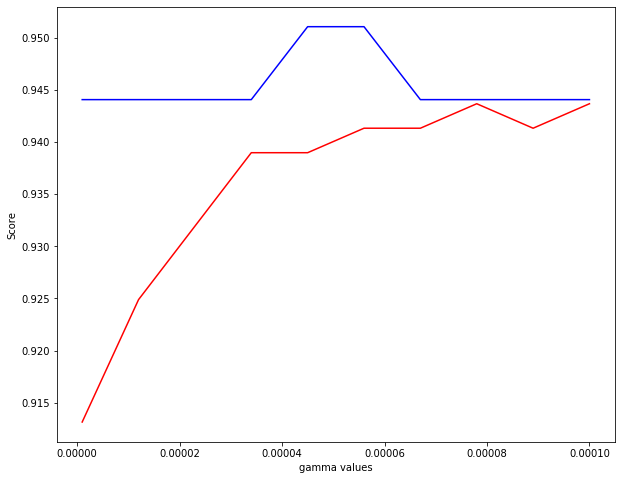

In [0]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

Gamma = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
Gamma = np.linspace(0.000001, 0.0001, 10)
Training_score = []
Testing_score = []

for gamma_val in Gamma:
    SVCObject = SVC(kernel = 'rbf', C=1, gamma = gamma_val)
    SVCFitting = SVCObject.fit(X_train, y_train)
    Training_score.append(SVCFitting.score(X_train, y_train))
    Testing_score.append(SVCFitting.score(X_test, y_test))
    
plt.figure(figsize = (10,8))
plt.plot(Gamma, Training_score, 'red')
plt.plot(Gamma, Testing_score, 'blue')

plt.xlabel('gamma values')
plt.ylabel('Score')
plt.show()


In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

BC_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(BC_data.data, BC_data.target, random_state = 0)

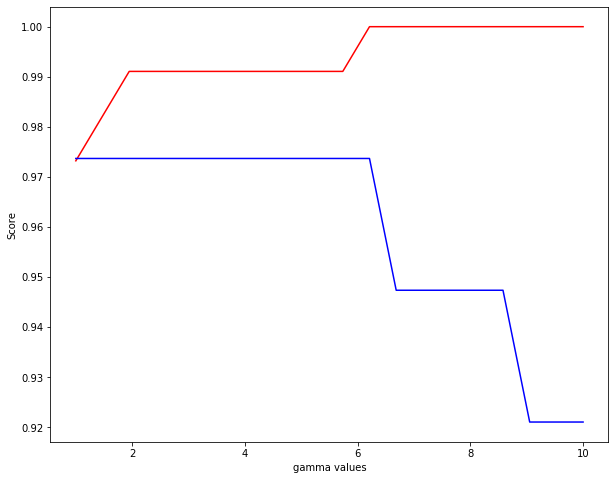

In [0]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

Gamma = np.linspace(1, 10, 20)
Training_score = []
Testing_score = []

for gamma_val in Gamma:
    SVCObject = SVC(kernel = 'rbf', C=1, gamma = gamma_val)
    SVCFitting = SVCObject.fit(X_train, y_train)
    Training_score.append(SVCFitting.score(X_train, y_train))
    Testing_score.append(SVCFitting.score(X_test, y_test))
    
plt.figure(figsize = (10,8))
plt.plot(Gamma, Training_score, 'red')
plt.plot(Gamma, Testing_score, 'blue')

plt.xlabel('gamma values')
plt.ylabel('Score')
plt.show()

類神經網路

In [0]:
import numpy as np

X = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y = np.array([0,0,0,1,0,1,1,0]).reshape(-1,1)

In [0]:
y.shape

(8, 1)

In [0]:
import numpy as np

X_train = np.vstack((X,X,X,X))
y_train = np.vstack((y,y,y,y))

In [0]:
from tensorflow.keras.models import Sequential
Model = Sequential()

In [0]:
from tensorflow.keras.layers import Dense

Model.add(Dense(4, activation = 'relu', input_dim = 3))

In [0]:
Model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 16        
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.layers import Dense

Model.add(Dense(1, activation = 'sigmoid'))

In [0]:
Model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [0]:
Model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [0]:
Model.fit(X_train, y_train, epochs = 1000, batch_size = 10)

Epoch 1/1000
4/4 [==============================] - 0s 739us/step - loss: 0.6759 - accuracy: 0.6250
Epoch 2/1000
4/4 [==============================] - 0s 498us/step - loss: 0.6756 - accuracy: 0.6250
Epoch 3/1000
4/4 [==============================] - 0s 747us/step - loss: 0.6755 - accuracy: 0.6250
Epoch 4/1000
4/4 [==============================] - 0s 498us/step - loss: 0.6750 - accuracy: 0.6250
Epoch 5/1000
4/4 [==============================] - 0s 749us/step - loss: 0.6748 - accuracy: 0.6250
Epoch 6/1000
4/4 [==============================] - 0s 748us/step - loss: 0.6747 - accuracy: 0.6250
Epoch 7/1000
4/4 [==============================] - 0s 752us/step - loss: 0.6743 - accuracy: 0.6250
Epoch 8/1000
4/4 [==============================] - 0s 748us/step - loss: 0.6740 - accuracy: 0.6250
Epoch 9/1000
4/4 [==============================] - 0s 748us/step - loss: 0.6736 - accuracy: 0.6250
Epoch 10/1000
4/4 [==============================] - 0s 748us/step - loss: 0.6734 - accuracy: 0.6250

4/4 [==============================] - 0s 499us/step - loss: 0.6534 - accuracy: 0.6250
Epoch 83/1000
4/4 [==============================] - 0s 742us/step - loss: 0.6533 - accuracy: 0.6250
Epoch 84/1000
4/4 [==============================] - 0s 748us/step - loss: 0.6527 - accuracy: 0.6250
Epoch 85/1000
4/4 [==============================] - 0s 498us/step - loss: 0.6524 - accuracy: 0.6250
Epoch 86/1000
4/4 [==============================] - 0s 491us/step - loss: 0.6521 - accuracy: 0.6250
Epoch 87/1000
4/4 [==============================] - 0s 748us/step - loss: 0.6519 - accuracy: 0.6250
Epoch 88/1000
4/4 [==============================] - 0s 741us/step - loss: 0.6516 - accuracy: 0.6250
Epoch 89/1000
4/4 [==============================] - 0s 748us/step - loss: 0.6516 - accuracy: 0.6250
Epoch 90/1000
4/4 [==============================] - 0s 499us/step - loss: 0.6510 - accuracy: 0.6250
Epoch 91/1000
4/4 [==============================] - 0s 499us/step - loss: 0.6507 - accuracy: 0.6250
Epoc

4/4 [==============================] - 0s 499us/step - loss: 0.6297 - accuracy: 0.6250
Epoch 163/1000
4/4 [==============================] - 0s 748us/step - loss: 0.6290 - accuracy: 0.6250
Epoch 164/1000
4/4 [==============================] - 0s 499us/step - loss: 0.6287 - accuracy: 0.6250
Epoch 165/1000
4/4 [==============================] - 0s 748us/step - loss: 0.6285 - accuracy: 0.6250
Epoch 166/1000
4/4 [==============================] - 0s 499us/step - loss: 0.6280 - accuracy: 0.6250
Epoch 167/1000
4/4 [==============================] - 0s 499us/step - loss: 0.6278 - accuracy: 0.6250
Epoch 168/1000
4/4 [==============================] - 0s 498us/step - loss: 0.6277 - accuracy: 0.6250
Epoch 169/1000
4/4 [==============================] - 0s 505us/step - loss: 0.6273 - accuracy: 0.6250
Epoch 170/1000
4/4 [==============================] - 0s 505us/step - loss: 0.6270 - accuracy: 0.6250
Epoch 171/1000
4/4 [==============================] - 0s 748us/step - loss: 0.6265 - accuracy: 0.

4/4 [==============================] - 0s 499us/step - loss: 0.6049 - accuracy: 0.6250
Epoch 243/1000
4/4 [==============================] - 0s 507us/step - loss: 0.6045 - accuracy: 0.6250
Epoch 244/1000
4/4 [==============================] - ETA: 0s - loss: 0.5850 - accuracy: 0.80 - 0s 499us/step - loss: 0.6043 - accuracy: 0.6250
Epoch 245/1000
4/4 [==============================] - 0s 499us/step - loss: 0.6039 - accuracy: 0.6250
Epoch 246/1000
4/4 [==============================] - 0s 748us/step - loss: 0.6038 - accuracy: 0.6250
Epoch 247/1000
4/4 [==============================] - 0s 748us/step - loss: 0.6034 - accuracy: 0.6250
Epoch 248/1000
4/4 [==============================] - 0s 499us/step - loss: 0.6030 - accuracy: 0.6250
Epoch 249/1000
4/4 [==============================] - 0s 499us/step - loss: 0.6031 - accuracy: 0.6250
Epoch 250/1000
4/4 [==============================] - 0s 748us/step - loss: 0.6026 - accuracy: 0.6250
Epoch 251/1000
4/4 [==============================] - 0

4/4 [==============================] - 0s 499us/step - loss: 0.5831 - accuracy: 0.6250
Epoch 323/1000
4/4 [==============================] - 0s 498us/step - loss: 0.5828 - accuracy: 0.6250
Epoch 324/1000
4/4 [==============================] - 0s 748us/step - loss: 0.5824 - accuracy: 0.6250
Epoch 325/1000
4/4 [==============================] - 0s 499us/step - loss: 0.5822 - accuracy: 0.6250
Epoch 326/1000
4/4 [==============================] - 0s 499us/step - loss: 0.5820 - accuracy: 0.6250
Epoch 327/1000
4/4 [==============================] - 0s 750us/step - loss: 0.5816 - accuracy: 0.6250
Epoch 328/1000
4/4 [==============================] - 0s 738us/step - loss: 0.5814 - accuracy: 0.6250
Epoch 329/1000
4/4 [==============================] - 0s 506us/step - loss: 0.5810 - accuracy: 0.6250
Epoch 330/1000
4/4 [==============================] - 0s 499us/step - loss: 0.5806 - accuracy: 0.6250
Epoch 331/1000
4/4 [==============================] - 0s 490us/step - loss: 0.5806 - accuracy: 0.

4/4 [==============================] - 0s 748us/step - loss: 0.5603 - accuracy: 0.6250
Epoch 403/1000
4/4 [==============================] - 0s 748us/step - loss: 0.5599 - accuracy: 0.6250
Epoch 404/1000
4/4 [==============================] - 0s 499us/step - loss: 0.5596 - accuracy: 0.6250
Epoch 405/1000
4/4 [==============================] - 0s 499us/step - loss: 0.5594 - accuracy: 0.6250
Epoch 406/1000
4/4 [==============================] - 0s 748us/step - loss: 0.5590 - accuracy: 0.6250
Epoch 407/1000
4/4 [==============================] - 0s 499us/step - loss: 0.5589 - accuracy: 0.6250
Epoch 408/1000
4/4 [==============================] - 0s 498us/step - loss: 0.5584 - accuracy: 0.6250
Epoch 409/1000
4/4 [==============================] - 0s 748us/step - loss: 0.5581 - accuracy: 0.6250
Epoch 410/1000
4/4 [==============================] - 0s 499us/step - loss: 0.5579 - accuracy: 0.6250
Epoch 411/1000
4/4 [==============================] - 0s 499us/step - loss: 0.5577 - accuracy: 0.

4/4 [==============================] - 0s 740us/step - loss: 0.5368 - accuracy: 0.6250
Epoch 483/1000
4/4 [==============================] - 0s 755us/step - loss: 0.5366 - accuracy: 0.6250
Epoch 484/1000
4/4 [==============================] - 0s 748us/step - loss: 0.5364 - accuracy: 0.6250
Epoch 485/1000
4/4 [==============================] - 0s 493us/step - loss: 0.5361 - accuracy: 0.6250
Epoch 486/1000
4/4 [==============================] - 0s 742us/step - loss: 0.5358 - accuracy: 0.6250
Epoch 487/1000
4/4 [==============================] - 0s 748us/step - loss: 0.5355 - accuracy: 0.6250
Epoch 488/1000
4/4 [==============================] - 0s 505us/step - loss: 0.5351 - accuracy: 0.6250
Epoch 489/1000
4/4 [==============================] - 0s 505us/step - loss: 0.5348 - accuracy: 0.6250
Epoch 490/1000
4/4 [==============================] - 0s 742us/step - loss: 0.5347 - accuracy: 0.6250
Epoch 491/1000
4/4 [==============================] - 0s 742us/step - loss: 0.5343 - accuracy: 0.

4/4 [==============================] - 0s 499us/step - loss: 0.5138 - accuracy: 0.6562
Epoch 563/1000
4/4 [==============================] - 0s 748us/step - loss: 0.5138 - accuracy: 0.6250
Epoch 564/1000
4/4 [==============================] - 0s 492us/step - loss: 0.5134 - accuracy: 0.7500
Epoch 565/1000
4/4 [==============================] - 0s 748us/step - loss: 0.5133 - accuracy: 0.6250
Epoch 566/1000
4/4 [==============================] - 0s 741us/step - loss: 0.5130 - accuracy: 0.6250
Epoch 567/1000
4/4 [==============================] - 0s 748us/step - loss: 0.5129 - accuracy: 0.6250
Epoch 568/1000
4/4 [==============================] - 0s 741us/step - loss: 0.5124 - accuracy: 0.6250
Epoch 569/1000
4/4 [==============================] - 0s 748us/step - loss: 0.5119 - accuracy: 0.6250
Epoch 570/1000
4/4 [==============================] - 0s 499us/step - loss: 0.5116 - accuracy: 0.6562
Epoch 571/1000
4/4 [==============================] - 0s 506us/step - loss: 0.5113 - accuracy: 0.

4/4 [==============================] - 0s 492us/step - loss: 0.4908 - accuracy: 0.7500
Epoch 643/1000
4/4 [==============================] - 0s 742us/step - loss: 0.4908 - accuracy: 0.7500
Epoch 644/1000
4/4 [==============================] - 0s 498us/step - loss: 0.4905 - accuracy: 0.7500
Epoch 645/1000
4/4 [==============================] - 0s 739us/step - loss: 0.4902 - accuracy: 0.7500
Epoch 646/1000
4/4 [==============================] - 0s 499us/step - loss: 0.4899 - accuracy: 0.7500
Epoch 647/1000
4/4 [==============================] - 0s 998us/step - loss: 0.4899 - accuracy: 0.7500
Epoch 648/1000
4/4 [==============================] - 0s 741us/step - loss: 0.4895 - accuracy: 0.7500
Epoch 649/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4891 - accuracy: 0.7500
Epoch 650/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4887 - accuracy: 0.7500
Epoch 651/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4885 - accuracy: 0.

4/4 [==============================] - 0s 499us/step - loss: 0.4666 - accuracy: 0.7500
Epoch 723/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4665 - accuracy: 0.7500
Epoch 724/1000
4/4 [==============================] - 0s 491us/step - loss: 0.4659 - accuracy: 0.7500
Epoch 725/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4659 - accuracy: 0.7500
Epoch 726/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4656 - accuracy: 0.7500
Epoch 727/1000
4/4 [==============================] - 0s 499us/step - loss: 0.4650 - accuracy: 0.7500
Epoch 728/1000
4/4 [==============================] - 0s 756us/step - loss: 0.4649 - accuracy: 0.7500
Epoch 729/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4645 - accuracy: 0.7500
Epoch 730/1000
4/4 [==============================] - 0s 499us/step - loss: 0.4642 - accuracy: 0.7500
Epoch 731/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4640 - accuracy: 0.

4/4 [==============================] - 0s 741us/step - loss: 0.4429 - accuracy: 0.7500
Epoch 803/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4426 - accuracy: 0.7500
Epoch 804/1000
4/4 [==============================] - 0s 740us/step - loss: 0.4423 - accuracy: 0.7500
Epoch 805/1000
4/4 [==============================] - 0s 504us/step - loss: 0.4421 - accuracy: 0.7500
Epoch 806/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4420 - accuracy: 0.7500
Epoch 807/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4415 - accuracy: 0.7500
Epoch 808/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4411 - accuracy: 0.7500
Epoch 809/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4408 - accuracy: 0.7500
Epoch 810/1000
4/4 [==============================] - 0s 747us/step - loss: 0.4406 - accuracy: 0.7500
Epoch 811/1000
4/4 [==============================] - 0s 506us/step - loss: 0.4405 - accuracy: 0.

4/4 [==============================] - 0s 499us/step - loss: 0.4179 - accuracy: 0.7500
Epoch 883/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4176 - accuracy: 0.7500
Epoch 884/1000
4/4 [==============================] - 0s 741us/step - loss: 0.4174 - accuracy: 0.7500
Epoch 885/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4170 - accuracy: 0.7500
Epoch 886/1000
4/4 [==============================] - 0s 499us/step - loss: 0.4167 - accuracy: 0.7500
Epoch 887/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4165 - accuracy: 0.7500
Epoch 888/1000
4/4 [==============================] - 0s 742us/step - loss: 0.4160 - accuracy: 0.7500
Epoch 889/1000
4/4 [==============================] - 0s 755us/step - loss: 0.4158 - accuracy: 0.7500
Epoch 890/1000
4/4 [==============================] - 0s 748us/step - loss: 0.4155 - accuracy: 0.7500
Epoch 891/1000
4/4 [==============================] - 0s 498us/step - loss: 0.4154 - accuracy: 0.

4/4 [==============================] - 0s 498us/step - loss: 0.3924 - accuracy: 1.0000
Epoch 963/1000
4/4 [==============================] - 0s 748us/step - loss: 0.3921 - accuracy: 1.0000
Epoch 964/1000
4/4 [==============================] - 0s 492us/step - loss: 0.3919 - accuracy: 1.0000
Epoch 965/1000
4/4 [==============================] - 0s 757us/step - loss: 0.3912 - accuracy: 1.0000
Epoch 966/1000
4/4 [==============================] - 0s 748us/step - loss: 0.3912 - accuracy: 1.0000
Epoch 967/1000
4/4 [==============================] - 0s 499us/step - loss: 0.3909 - accuracy: 1.0000
Epoch 968/1000
4/4 [==============================] - 0s 499us/step - loss: 0.3906 - accuracy: 1.0000
Epoch 969/1000
4/4 [==============================] - 0s 748us/step - loss: 0.3903 - accuracy: 1.0000
Epoch 970/1000
4/4 [==============================] - 0s 499us/step - loss: 0.3900 - accuracy: 1.0000
Epoch 971/1000
4/4 [==============================] - 0s 498us/step - loss: 0.3898 - accuracy: 1.

In [0]:
Model.save('MY_model.h5')

In [0]:
import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1]).reshape(-1,1)
X_train = np.vstack((X,X,X,X))
y_train = np.vstack((y,y,y,y))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Model = Sequential()
Model.add(Dense(4, activation = 'relu', input_dim = 2))
Model.add(Dense(1, activation = 'sigmoid'))

In [0]:
Model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [0]:
Model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [0]:
Model.fit(X_train, y_train, epochs = 1000, batch_size = 10, verbose = 1)

Epoch 1/1000
2/2 [==============================] - 0s 511us/step - loss: 0.6752 - accuracy: 0.7500
Epoch 2/1000
2/2 [==============================] - 0s 498us/step - loss: 0.6708 - accuracy: 0.7500
Epoch 3/1000
2/2 [==============================] - 0s 498us/step - loss: 0.6679 - accuracy: 0.7500
Epoch 4/1000
2/2 [==============================] - 0s 497us/step - loss: 0.6655 - accuracy: 0.7500
Epoch 5/1000
2/2 [==============================] - 0s 997us/step - loss: 0.6634 - accuracy: 0.7500
Epoch 6/1000
2/2 [==============================] - 0s 998us/step - loss: 0.6621 - accuracy: 0.7500
Epoch 7/1000
2/2 [==============================] - 0s 997us/step - loss: 0.6603 - accuracy: 0.7500
Epoch 8/1000
2/2 [==============================] - 0s 982us/step - loss: 0.6589 - accuracy: 0.7500
Epoch 9/1000
2/2 [==============================] - 0s 997us/step - loss: 0.6570 - accuracy: 0.7500
Epoch 10/1000
2/2 [==============================] - 0s 997us/step - loss: 0.6556 - accuracy: 0.7500

2/2 [==============================] - 0s 499us/step - loss: 0.5722 - accuracy: 0.7500
Epoch 83/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.5710 - accuracy: 0.7500
Epoch 84/1000
2/2 [==============================] - 0s 998us/step - loss: 0.5698 - accuracy: 0.7500
Epoch 85/1000
2/2 [==============================] - 0s 498us/step - loss: 0.5686 - accuracy: 0.7500
Epoch 86/1000
2/2 [==============================] - 0s 997us/step - loss: 0.5675 - accuracy: 0.7500
Epoch 87/1000
2/2 [==============================] - 0s 486us/step - loss: 0.5662 - accuracy: 0.7500
Epoch 88/1000
2/2 [==============================] - 0s 998us/step - loss: 0.5650 - accuracy: 0.7500
Epoch 89/1000
2/2 [==============================] - 0s 514us/step - loss: 0.5638 - accuracy: 0.7500
Epoch 90/1000
2/2 [==============================] - 0s 499us/step - loss: 0.5626 - accuracy: 0.7500
Epoch 91/1000
2/2 [==============================] - 0s 997us/step - loss: 0.5622 - accuracy: 0.7500
Epoch 

2/2 [==============================] - 0s 996us/step - loss: 0.4896 - accuracy: 0.7500
Epoch 163/1000
2/2 [==============================] - 0s 498us/step - loss: 0.4890 - accuracy: 0.7500
Epoch 164/1000
2/2 [==============================] - 0s 499us/step - loss: 0.4879 - accuracy: 0.7500
Epoch 165/1000
2/2 [==============================] - 0s 499us/step - loss: 0.4872 - accuracy: 0.7500
Epoch 166/1000
2/2 [==============================] - ETA: 0s - loss: 0.4929 - accuracy: 0.70 - 0s 482us/step - loss: 0.4860 - accuracy: 0.7500
Epoch 167/1000
2/2 [==============================] - 0s 498us/step - loss: 0.4853 - accuracy: 0.7500
Epoch 168/1000
2/2 [==============================] - 0s 499us/step - loss: 0.4840 - accuracy: 0.7500
Epoch 169/1000
2/2 [==============================] - 0s 983us/step - loss: 0.4837 - accuracy: 0.7500
Epoch 170/1000
2/2 [==============================] - 0s 499us/step - loss: 0.4823 - accuracy: 0.7500
Epoch 171/1000
2/2 [==============================] - 0

Epoch 242/1000
2/2 [==============================] - 0s 998us/step - loss: 0.4046 - accuracy: 1.0000
Epoch 243/1000
2/2 [==============================] - 0s 997us/step - loss: 0.4040 - accuracy: 1.0000
Epoch 244/1000
2/2 [==============================] - 0s 603us/step - loss: 0.4027 - accuracy: 1.0000
Epoch 245/1000
2/2 [==============================] - 0s 998us/step - loss: 0.4017 - accuracy: 1.0000
Epoch 246/1000
2/2 [==============================] - 0s 998us/step - loss: 0.4007 - accuracy: 1.0000
Epoch 247/1000
2/2 [==============================] - 0s 998us/step - loss: 0.3998 - accuracy: 1.0000
Epoch 248/1000
2/2 [==============================] - 0s 409us/step - loss: 0.3992 - accuracy: 1.0000
Epoch 249/1000
2/2 [==============================] - 0s 499us/step - loss: 0.3978 - accuracy: 1.0000
Epoch 250/1000
2/2 [==============================] - 0s 499us/step - loss: 0.3967 - accuracy: 1.0000
Epoch 251/1000
2/2 [==============================] - 0s 498us/step - loss: 0.3958

2/2 [==============================] - 0s 998us/step - loss: 0.3284 - accuracy: 1.0000
Epoch 323/1000
2/2 [==============================] - 0s 499us/step - loss: 0.3274 - accuracy: 1.0000
Epoch 324/1000
2/2 [==============================] - 0s 998us/step - loss: 0.3267 - accuracy: 1.0000
Epoch 325/1000
2/2 [==============================] - 0s 998us/step - loss: 0.3258 - accuracy: 1.0000
Epoch 326/1000
2/2 [==============================] - 0s 512us/step - loss: 0.3250 - accuracy: 1.0000
Epoch 327/1000
2/2 [==============================] - 0s 496us/step - loss: 0.3242 - accuracy: 1.0000
Epoch 328/1000
2/2 [==============================] - 0s 997us/step - loss: 0.3236 - accuracy: 1.0000
Epoch 329/1000
2/2 [==============================] - 0s 486us/step - loss: 0.3229 - accuracy: 1.0000
Epoch 330/1000
2/2 [==============================] - 0s 498us/step - loss: 0.3217 - accuracy: 1.0000
Epoch 331/1000
2/2 [==============================] - 0s 997us/step - loss: 0.3208 - accuracy: 1.

2/2 [==============================] - 0s 999us/step - loss: 0.2615 - accuracy: 1.0000
Epoch 403/1000
2/2 [==============================] - 0s 499us/step - loss: 0.2608 - accuracy: 1.0000
Epoch 404/1000
2/2 [==============================] - 0s 983us/step - loss: 0.2601 - accuracy: 1.0000
Epoch 405/1000
2/2 [==============================] - 0s 997us/step - loss: 0.2597 - accuracy: 1.0000
Epoch 406/1000
2/2 [==============================] - 0s 498us/step - loss: 0.2586 - accuracy: 1.0000
Epoch 407/1000
2/2 [==============================] - 0s 985us/step - loss: 0.2580 - accuracy: 1.0000
Epoch 408/1000
2/2 [==============================] - 0s 505us/step - loss: 0.2572 - accuracy: 1.0000
Epoch 409/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2565 - accuracy: 1.0000
Epoch 410/1000
2/2 [==============================] - 0s 512us/step - loss: 0.2562 - accuracy: 1.0000
Epoch 411/1000
2/2 [==============================] - 0s 994us/step - loss: 0.2551 - accuracy: 1.00

2/2 [==============================] - 0s 997us/step - loss: 0.2055 - accuracy: 1.0000
Epoch 483/1000
2/2 [==============================] - 0s 998us/step - loss: 0.2049 - accuracy: 1.0000
Epoch 484/1000
2/2 [==============================] - 0s 498us/step - loss: 0.2042 - accuracy: 1.0000
Epoch 485/1000
2/2 [==============================] - 0s 499us/step - loss: 0.2036 - accuracy: 1.0000
Epoch 486/1000
2/2 [==============================] - 0s 498us/step - loss: 0.2030 - accuracy: 1.0000
Epoch 487/1000
2/2 [==============================] - 0s 499us/step - loss: 0.2021 - accuracy: 1.0000
Epoch 488/1000
2/2 [==============================] - 0s 998us/step - loss: 0.2015 - accuracy: 1.0000
Epoch 489/1000
2/2 [==============================] - ETA: 0s - loss: 0.2406 - accuracy: 1.00 - 0s 499us/step - loss: 0.2008 - accuracy: 1.0000
Epoch 490/1000
2/2 [==============================] - 0s 499us/step - loss: 0.2000 - accuracy: 1.0000
Epoch 491/1000
2/2 [==============================] - 0

2/2 [==============================] - 0s 985us/step - loss: 0.1563 - accuracy: 1.0000
Epoch 563/1000
2/2 [==============================] - 0s 997us/step - loss: 0.1556 - accuracy: 1.0000
Epoch 564/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1551 - accuracy: 1.0000
Epoch 565/1000
2/2 [==============================] - 0s 499us/step - loss: 0.1545 - accuracy: 1.0000
Epoch 566/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1541 - accuracy: 1.0000
Epoch 567/1000
2/2 [==============================] - 0s 499us/step - loss: 0.1534 - accuracy: 1.0000
Epoch 568/1000
2/2 [==============================] - 0s 499us/step - loss: 0.1529 - accuracy: 1.0000
Epoch 569/1000
2/2 [==============================] - 0s 997us/step - loss: 0.1524 - accuracy: 1.0000
Epoch 570/1000
2/2 [==============================] - 0s 498us/step - loss: 0.1519 - accuracy: 1.0000
Epoch 571/1000
2/2 [==============================] - 0s 980us/step - loss: 0.1515 - accuracy: 1.0000

2/2 [==============================] - 0s 499us/step - loss: 0.1170 - accuracy: 1.0000
Epoch 643/1000
2/2 [==============================] - 0s 512us/step - loss: 0.1166 - accuracy: 1.0000
Epoch 644/1000
2/2 [==============================] - 0s 498us/step - loss: 0.1163 - accuracy: 1.0000
Epoch 645/1000
2/2 [==============================] - 0s 484us/step - loss: 0.1159 - accuracy: 1.0000
Epoch 646/1000
2/2 [==============================] - 0s 983us/step - loss: 0.1153 - accuracy: 1.0000
Epoch 647/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 1.0000
Epoch 648/1000
2/2 [==============================] - 0s 513us/step - loss: 0.1144 - accuracy: 1.0000
Epoch 649/1000
2/2 [==============================] - 0s 983us/step - loss: 0.1140 - accuracy: 1.0000
Epoch 650/1000
2/2 [==============================] - 0s 997us/step - loss: 0.1135 - accuracy: 1.0000
Epoch 651/1000
2/2 [==============================] - 0s 499us/step - loss: 0.1130 - accuracy: 1.00

2/2 [==============================] - 0s 988us/step - loss: 0.0852 - accuracy: 1.0000
Epoch 723/1000
2/2 [==============================] - 0s 514us/step - loss: 0.0847 - accuracy: 1.0000
Epoch 724/1000
2/2 [==============================] - 0s 498us/step - loss: 0.0843 - accuracy: 1.0000
Epoch 725/1000
2/2 [==============================] - 0s 498us/step - loss: 0.0843 - accuracy: 1.0000
Epoch 726/1000
2/2 [==============================] - 0s 983us/step - loss: 0.0837 - accuracy: 1.0000
Epoch 727/1000
2/2 [==============================] - 0s 511us/step - loss: 0.0835 - accuracy: 1.0000
Epoch 728/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 1.0000
Epoch 729/1000
2/2 [==============================] - 0s 511us/step - loss: 0.0827 - accuracy: 1.0000
Epoch 730/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0826 - accuracy: 1.0000
Epoch 731/1000
2/2 [==============================] - 0s 998us/step - loss: 0.0820 - accuracy: 1.00

2/2 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 1.0000
Epoch 803/1000
2/2 [==============================] - 0s 514us/step - loss: 0.0605 - accuracy: 1.0000
Epoch 804/1000
2/2 [==============================] - 0s 998us/step - loss: 0.0603 - accuracy: 1.0000
Epoch 805/1000
2/2 [==============================] - 0s 498us/step - loss: 0.0600 - accuracy: 1.0000
Epoch 806/1000
2/2 [==============================] - 0s 498us/step - loss: 0.0597 - accuracy: 1.0000
Epoch 807/1000
2/2 [==============================] - 0s 996us/step - loss: 0.0595 - accuracy: 1.0000
Epoch 808/1000
2/2 [==============================] - 0s 512us/step - loss: 0.0591 - accuracy: 1.0000
Epoch 809/1000
2/2 [==============================] - 0s 984us/step - loss: 0.0588 - accuracy: 1.0000
Epoch 810/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0586 - accuracy: 1.0000
Epoch 811/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0583 - accuracy: 1.00

2/2 [==============================] - 0s 499us/step - loss: 0.0422 - accuracy: 1.0000
Epoch 883/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 1.0000
Epoch 884/1000
2/2 [==============================] - 0s 512us/step - loss: 0.0417 - accuracy: 1.0000
Epoch 885/1000
2/2 [==============================] - 0s 515us/step - loss: 0.0416 - accuracy: 1.0000
Epoch 886/1000
2/2 [==============================] - 0s 499us/step - loss: 0.0413 - accuracy: 1.0000
Epoch 887/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0412 - accuracy: 1.0000
Epoch 888/1000
2/2 [==============================] - 0s 498us/step - loss: 0.0409 - accuracy: 1.0000
Epoch 889/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0408 - accuracy: 1.0000
Epoch 890/1000
2/2 [==============================] - 0s 517us/step - loss: 0.0405 - accuracy: 1.0000
Epoch 891/1000
2/2 [==============================] - 0s 498us/step - loss: 0.0404 - accuracy: 1.00

2/2 [==============================] - 0s 486us/step - loss: 0.0282 - accuracy: 1.0000
Epoch 963/1000
2/2 [==============================] - 0s 998us/step - loss: 0.0281 - accuracy: 1.0000
Epoch 964/1000
2/2 [==============================] - 0s 982us/step - loss: 0.0280 - accuracy: 1.0000
Epoch 965/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0278 - accuracy: 1.0000
Epoch 966/1000
2/2 [==============================] - 0s 985us/step - loss: 0.0277 - accuracy: 1.0000
Epoch 967/1000
2/2 [==============================] - 0s 998us/step - loss: 0.0276 - accuracy: 1.0000
Epoch 968/1000
2/2 [==============================] - 0s 986us/step - loss: 0.0275 - accuracy: 1.0000
Epoch 969/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0273 - accuracy: 1.0000
Epoch 970/1000
2/2 [==============================] - 0s 487us/step - loss: 0.0272 - accuracy: 1.0000
Epoch 971/1000
2/2 [==============================] - 0s 983us/step - loss: 0.0270 - accuracy: 1.

In [0]:
import numpy as np
X = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y = np.array([[1,0],[0,1],[0,1],[1,0],[0,1],[1,0],[1,0],[0,1]])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Model = Sequential()
Model.add(Dense(10, activation = 'relu', input_dim = 3))
Model.add(Dense(10, activation = 'relu'))
Model.add(Dense(2, activation = 'sigmoid'))

In [0]:
Model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [0]:
Model.fit(X, y, epochs = 1000, batch_size = 10, verbose = 1)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.7093 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 971us/step - loss: 0.7067 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 0s/step - loss: 0.7048 - accuracy: 0.6250
Epoch 4/1000
1/1 [==============================] - 0s 970us/step - loss: 0.7032 - accuracy: 0.6250
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.7018 - accuracy: 0.6250
Epoch 6/1000
1/1 [==============================] - 0s 997us/step - loss: 0.7006 - accuracy: 0.6250
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.6250
Epoch 8/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6984 - accuracy: 0.6250
Epoch 9/1000
1/1 [==============================] - 0s 998us/step - loss: 0.6974 - accuracy: 0.6250
Epoch 10/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6965 - accuracy: 0.6250
Epoch 11/1000


1/1 [==============================] - 0s 997us/step - loss: 0.6574 - accuracy: 0.8750
Epoch 84/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.8750
Epoch 85/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6564 - accuracy: 0.8750
Epoch 86/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6560 - accuracy: 0.8750
Epoch 87/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6555 - accuracy: 0.8750
Epoch 88/1000
1/1 [==============================] - 0s 999us/step - loss: 0.6550 - accuracy: 0.8750
Epoch 89/1000
1/1 [==============================] - 0s 983us/step - loss: 0.6544 - accuracy: 0.8750
Epoch 90/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6539 - accuracy: 0.8750
Epoch 91/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6534 - accuracy: 0.8750
Epoch 92/1000
1/1 [==============================] - 0s 973us/step - loss: 0.6528 - accuracy: 0.8750
Epoch 93/1000
1/1 [==

1/1 [==============================] - 0s 997us/step - loss: 0.6154 - accuracy: 0.8750
Epoch 165/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.8750
Epoch 166/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6146 - accuracy: 0.8750
Epoch 167/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6138 - accuracy: 0.8750
Epoch 168/1000
1/1 [==============================] - 0s 996us/step - loss: 0.6135 - accuracy: 0.8750
Epoch 169/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6128 - accuracy: 0.8750
Epoch 170/1000
1/1 [==============================] - 0s 997us/step - loss: 0.6124 - accuracy: 0.8750
Epoch 171/1000
1/1 [==============================] - 0s 998us/step - loss: 0.6119 - accuracy: 0.8750
Epoch 172/1000
1/1 [==============================] - 0s 998us/step - loss: 0.6111 - accuracy: 0.8750
Epoch 173/1000
1/1 [==============================] - 0s 967us/step - loss: 0.6107 - accuracy: 0.8750
Epoch

1/1 [==============================] - 0s 998us/step - loss: 0.5701 - accuracy: 0.8750
Epoch 246/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.8750
Epoch 247/1000
1/1 [==============================] - 0s 998us/step - loss: 0.5691 - accuracy: 0.8750
Epoch 248/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5683 - accuracy: 0.8750
Epoch 249/1000
1/1 [==============================] - 0s 998us/step - loss: 0.5677 - accuracy: 0.8750
Epoch 250/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5669 - accuracy: 0.8750
Epoch 251/1000
1/1 [==============================] - 0s 991us/step - loss: 0.5666 - accuracy: 0.8750
Epoch 252/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5659 - accuracy: 0.8750
Epoch 253/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.8750
Epoch 254/1000
1/1 [==============================] - 0s 998us/step - loss: 0.5645 - accuracy: 0.8750
Epoch

1/1 [==============================] - 0s 998us/step - loss: 0.5145 - accuracy: 0.8750
Epoch 327/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5139 - accuracy: 0.8750
Epoch 328/1000
1/1 [==============================] - 0s 996us/step - loss: 0.5130 - accuracy: 0.8750
Epoch 329/1000
1/1 [==============================] - 0s 997us/step - loss: 0.5122 - accuracy: 0.8750
Epoch 330/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.8750
Epoch 331/1000
1/1 [==============================] - 0s 998us/step - loss: 0.5109 - accuracy: 0.8750
Epoch 332/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5100 - accuracy: 0.8750
Epoch 333/1000
1/1 [==============================] - 0s 0s/step - loss: 0.5090 - accuracy: 0.8750
Epoch 334/1000
1/1 [==============================] - 0s 969us/step - loss: 0.5086 - accuracy: 0.8750
Epoch 335/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5077 - accuracy: 0.8750
Epoch 33

1/1 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 1.0000
Epoch 408/1000
1/1 [==============================] - 0s 0s/step - loss: 0.4480 - accuracy: 1.0000
Epoch 409/1000
1/1 [==============================] - 0s 0s/step - loss: 0.4470 - accuracy: 1.0000
Epoch 410/1000
1/1 [==============================] - 0s 969us/step - loss: 0.4461 - accuracy: 1.0000
Epoch 411/1000
1/1 [==============================] - 0s 968us/step - loss: 0.4452 - accuracy: 1.0000
Epoch 412/1000
1/1 [==============================] - 0s 997us/step - loss: 0.4442 - accuracy: 1.0000
Epoch 413/1000
1/1 [==============================] - 0s 997us/step - loss: 0.4433 - accuracy: 1.0000
Epoch 414/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 1.0000
Epoch 415/1000
1/1 [==============================] - 0s 0s/step - loss: 0.4419 - accuracy: 1.0000
Epoch 416/1000
1/1 [==============================] - 0s 0s/step - loss: 0.4407 - accuracy: 1.0000
Epoch 417/1

1/1 [==============================] - 0s 997us/step - loss: 0.3746 - accuracy: 1.0000
Epoch 489/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3736 - accuracy: 1.0000
Epoch 490/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3726 - accuracy: 1.0000
Epoch 491/1000
1/1 [==============================] - 0s 996us/step - loss: 0.3718 - accuracy: 1.0000
Epoch 492/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 1.0000
Epoch 493/1000
1/1 [==============================] - 0s 998us/step - loss: 0.3698 - accuracy: 1.0000
Epoch 494/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3688 - accuracy: 1.0000
Epoch 495/1000
1/1 [==============================] - 0s 997us/step - loss: 0.3684 - accuracy: 1.0000
Epoch 496/1000
1/1 [==============================] - 0s 998us/step - loss: 0.3669 - accuracy: 1.0000
Epoch 497/1000
1/1 [==============================] - 0s 997us/step - loss: 0.3659 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.2970 - accuracy: 1.0000
Epoch 570/1000
1/1 [==============================] - 0s 974us/step - loss: 0.2962 - accuracy: 1.0000
Epoch 571/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2954 - accuracy: 1.0000
Epoch 572/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2947 - accuracy: 1.0000
Epoch 573/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2931 - accuracy: 1.0000
Epoch 574/1000
1/1 [==============================] - 0s 996us/step - loss: 0.2921 - accuracy: 1.0000
Epoch 575/1000
1/1 [==============================] - 0s 994us/step - loss: 0.2915 - accuracy: 1.0000
Epoch 576/1000
1/1 [==============================] - 0s 997us/step - loss: 0.2906 - accuracy: 1.0000
Epoch 577/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2896 - accuracy: 1.0000
Epoch 578/1000
1/1 [==============================] - 0s 968us/step - loss: 0.2886 - accuracy: 1.0000
Epoch 579/

1/1 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 1.0000
Epoch 651/1000
1/1 [==============================] - 0s 996us/step - loss: 0.2217 - accuracy: 1.0000
Epoch 652/1000
1/1 [==============================] - 0s 970us/step - loss: 0.2205 - accuracy: 1.0000
Epoch 653/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2197 - accuracy: 1.0000
Epoch 654/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2188 - accuracy: 1.0000
Epoch 655/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2179 - accuracy: 1.0000
Epoch 656/1000
1/1 [==============================] - 0s 0s/step - loss: 0.2177 - accuracy: 1.0000
Epoch 657/1000
1/1 [==============================] - 0s 998us/step - loss: 0.2162 - accuracy: 1.0000
Epoch 658/1000
1/1 [==============================] - 0s 998us/step - loss: 0.2153 - accuracy: 1.0000
Epoch 659/1000
1/1 [==============================] - 0s 974us/step - loss: 0.2145 - accuracy: 1.0000
Epoch 660

1/1 [==============================] - 0s 996us/step - loss: 0.1579 - accuracy: 1.0000
Epoch 732/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1571 - accuracy: 1.0000
Epoch 733/1000
1/1 [==============================] - 0s 996us/step - loss: 0.1564 - accuracy: 1.0000
Epoch 734/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1558 - accuracy: 1.0000
Epoch 735/1000
1/1 [==============================] - 0s 999us/step - loss: 0.1552 - accuracy: 1.0000
Epoch 736/1000
1/1 [==============================] - 0s 999us/step - loss: 0.1543 - accuracy: 1.0000
Epoch 737/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1536 - accuracy: 1.0000
Epoch 738/1000
1/1 [==============================] - 0s 993us/step - loss: 0.1530 - accuracy: 1.0000
Epoch 739/1000
1/1 [==============================] - 0s 997us/step - loss: 0.1521 - accuracy: 1.0000
Epoch 740/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1513 - accuracy: 1.0000
Epoch 7

1/1 [==============================] - 0s 951us/step - loss: 0.1045 - accuracy: 1.0000
Epoch 813/1000
1/1 [==============================] - 0s 998us/step - loss: 0.1036 - accuracy: 1.0000
Epoch 814/1000
1/1 [==============================] - 0s 998us/step - loss: 0.1031 - accuracy: 1.0000
Epoch 815/1000
1/1 [==============================] - 0s 997us/step - loss: 0.1025 - accuracy: 1.0000
Epoch 816/1000
1/1 [==============================] - 0s 997us/step - loss: 0.1018 - accuracy: 1.0000
Epoch 817/1000
1/1 [==============================] - 0s 994us/step - loss: 0.1013 - accuracy: 1.0000
Epoch 818/1000
1/1 [==============================] - 0s 997us/step - loss: 0.1007 - accuracy: 1.0000
Epoch 819/1000
1/1 [==============================] - 0s 997us/step - loss: 0.1002 - accuracy: 1.0000
Epoch 820/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0996 - accuracy: 1.0000
Epoch 821/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0990 - accuracy: 1.0000
E

1/1 [==============================] - 0s 997us/step - loss: 0.0640 - accuracy: 1.0000
Epoch 894/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0633 - accuracy: 1.0000
Epoch 895/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0629 - accuracy: 1.0000
Epoch 896/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 1.0000
Epoch 897/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0623 - accuracy: 1.0000
Epoch 898/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0618 - accuracy: 1.0000
Epoch 899/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0614 - accuracy: 1.0000
Epoch 900/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0609 - accuracy: 1.0000
Epoch 901/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0605 - accuracy: 1.0000
Epoch 902/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0602 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 1ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 975/1000
1/1 [==============================] - 0s 981us/step - loss: 0.0363 - accuracy: 1.0000
Epoch 976/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0360 - accuracy: 1.0000
Epoch 977/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0356 - accuracy: 1.0000
Epoch 978/1000
1/1 [==============================] - 0s 982us/step - loss: 0.0355 - accuracy: 1.0000
Epoch 979/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0352 - accuracy: 1.0000
Epoch 980/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0350 - accuracy: 1.0000
Epoch 981/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0346 - accuracy: 1.0000
Epoch 982/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0343 - accuracy: 1.0000
Epoch 983/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0341 - accuracy: 1.0000
Epoch 98